### Loading required liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm


### Loading the required dataset and creating a dataframe

In [2]:
df = pd.read_csv('Data/cancer.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Renaming columns

In [3]:
# Renaming columns
column_names = {0: "id number", 1: "Clump Thickness", 2: "Uniformity of Cell Size", 3: "Uniformity of Cell Shape", 4: "Marginal Adhesion", 5:"Single Epithelial Cell Size",
              6: "Bare Nuclei", 7: "Bland Chromatin", 8: "Normal Nucleoli", 9: "Mitoses", 10: "Class"}


df = df.rename(columns=column_names)
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Examining the data set

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


- from the above information we can see that our dataset have no missing values. It has 11 columns of which 10 of them are of int datatype and only one is an object.
- We need to convert the non integer values to integers

In [5]:
#Inspecting the object values further
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

- upon inspecting the object values we have discovered that it has 16 ?

In [6]:
# converting the non integer values to integers
df["Bare Nuclei"] = df["Bare Nuclei"].replace("?", 0) 
df["Bare Nuclei"] = df["Bare Nuclei"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id number                    699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


- All our data is of integer datatype
- We decided to replace ? with a 0 to make all values in the Bare Nuclei to be integers

In [7]:
# Drop the ID and Class and convert the DataFrame to a NumPy array
df = df.drop(columns = df.columns[0], axis=1)

In [8]:
# The basic descriptive statistics
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Feature selection for our model

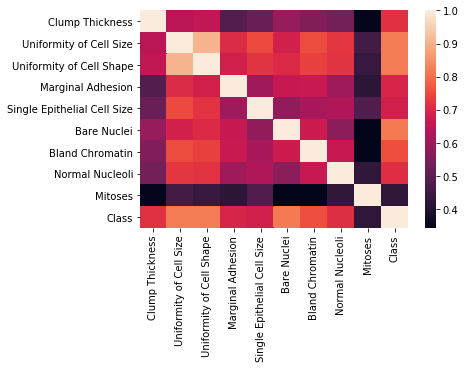

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()['Class']

Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.817653
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

In [21]:
df.pvalues

AttributeError: 'DataFrame' object has no attribute 'pvalues'

### Splitting the dataset into training and dataset

In [11]:
# segregate features and lables into separate variables
X= df.drop(['Class'], axis=1)
y=df['Class']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Transforming the features

In [12]:
# Features
X,y = df.drop('Class', axis = 1) , df['Class']

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

### Building a model

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:

predict_model = model.predict(X_test)

### Confussion matrix

In [16]:
pd.DataFrame(data=confusion_matrix(y_test, predict_model))

,0,1
0,141,2
1,5,62


- 94 + 42 correct predictions
- 3 + 1 incorrect predictions

### Classification report

In [17]:
#classification report for the training dataset
print(classification_report(y_test, predict_model))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [18]:
#Adding constant column 
X1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X1).fit()
model.pvalues

const                          2.950962e-212
Clump Thickness                 2.791906e-18
Uniformity of Cell Size         5.462468e-04
Uniformity of Cell Shape        6.308670e-03
Marginal Adhesion               1.596158e-01
Single Epithelial Cell Size     1.713468e-01
Bare Nuclei                     9.192607e-42
Bland Chromatin                 4.296908e-05
Normal Nucleoli                 2.422993e-06
Mitoses                         6.350910e-01
dtype: float64

The threshold pvalue is 0.05
- Marginal adhension has a high pvalue which is more than the threshold pvalue so we will drop it.
- Single Epithelial cell shape has a high pvalue which is more than the threshold pvalue so we will drop it.
- Mitoses has a high pvalue which is more than the threshold pvalue so we will drop it.
